In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#To read the data
std = pd.read_excel("Data_Exploration_student.xlsx")

In [3]:
#To get the shape of the data
std.shape

(73462, 14)

In [4]:
#to get the variable names
std.columns

Index(['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender',
       'MentalHealth', 'MainBranch', 'YearsCode', 'YearsCodePro', 'Country',
       'PreviousSalary', 'HaveWorkedWith', 'ComputerSkills', 'Employed'],
      dtype='object')

In [5]:
#Data Pre-Processing and Exploratory Data Analysis
#To get the information of the dataset
std.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932,C++;Python,2,0


In [6]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             73462 non-null  object
 1   Accessibility   73462 non-null  object
 2   EdLevel         73462 non-null  object
 3   Employment      73462 non-null  int64 
 4   Gender          73462 non-null  object
 5   MentalHealth    73462 non-null  object
 6   MainBranch      73462 non-null  object
 7   YearsCode       73462 non-null  int64 
 8   YearsCodePro    73462 non-null  int64 
 9   Country         73462 non-null  object
 10  PreviousSalary  73462 non-null  int64 
 11  HaveWorkedWith  73399 non-null  object
 12  ComputerSkills  73462 non-null  int64 
 13  Employed        73462 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 7.8+ MB


In [7]:
std.isnull().sum()

Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64

'HaveWorkedWith' variable have 63 null values..out of 73462 datarows, only 63 values are null..so leaving as such without any imputation or dropping them.

In [8]:
#to get the statistical summary of the numerical variables in the dataset 
std.describe()

,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
count,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000
mean,0.883096,14.218902,9.098377,67750.260611,13.428221,0.536223
std,0.321308,9.405172,7.960201,49488.142118,7.057835,0.498690
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,7.000000,3.000000,28839.000000,8.000000,0.000000
50%,1.000000,12.000000,7.000000,57588.000000,13.000000,1.000000
75%,1.000000,20.000000,12.000000,95979.000000,17.000000,1.000000
max,1.000000,50.000000,50.000000,224000.000000,107.000000,1.000000


#Although 'Employment' and 'Employed' variables are categorical, they took values of 0 and 1, so they get featured in the describe function.From the output, we could see that 'ComputerSkills' have outliers.

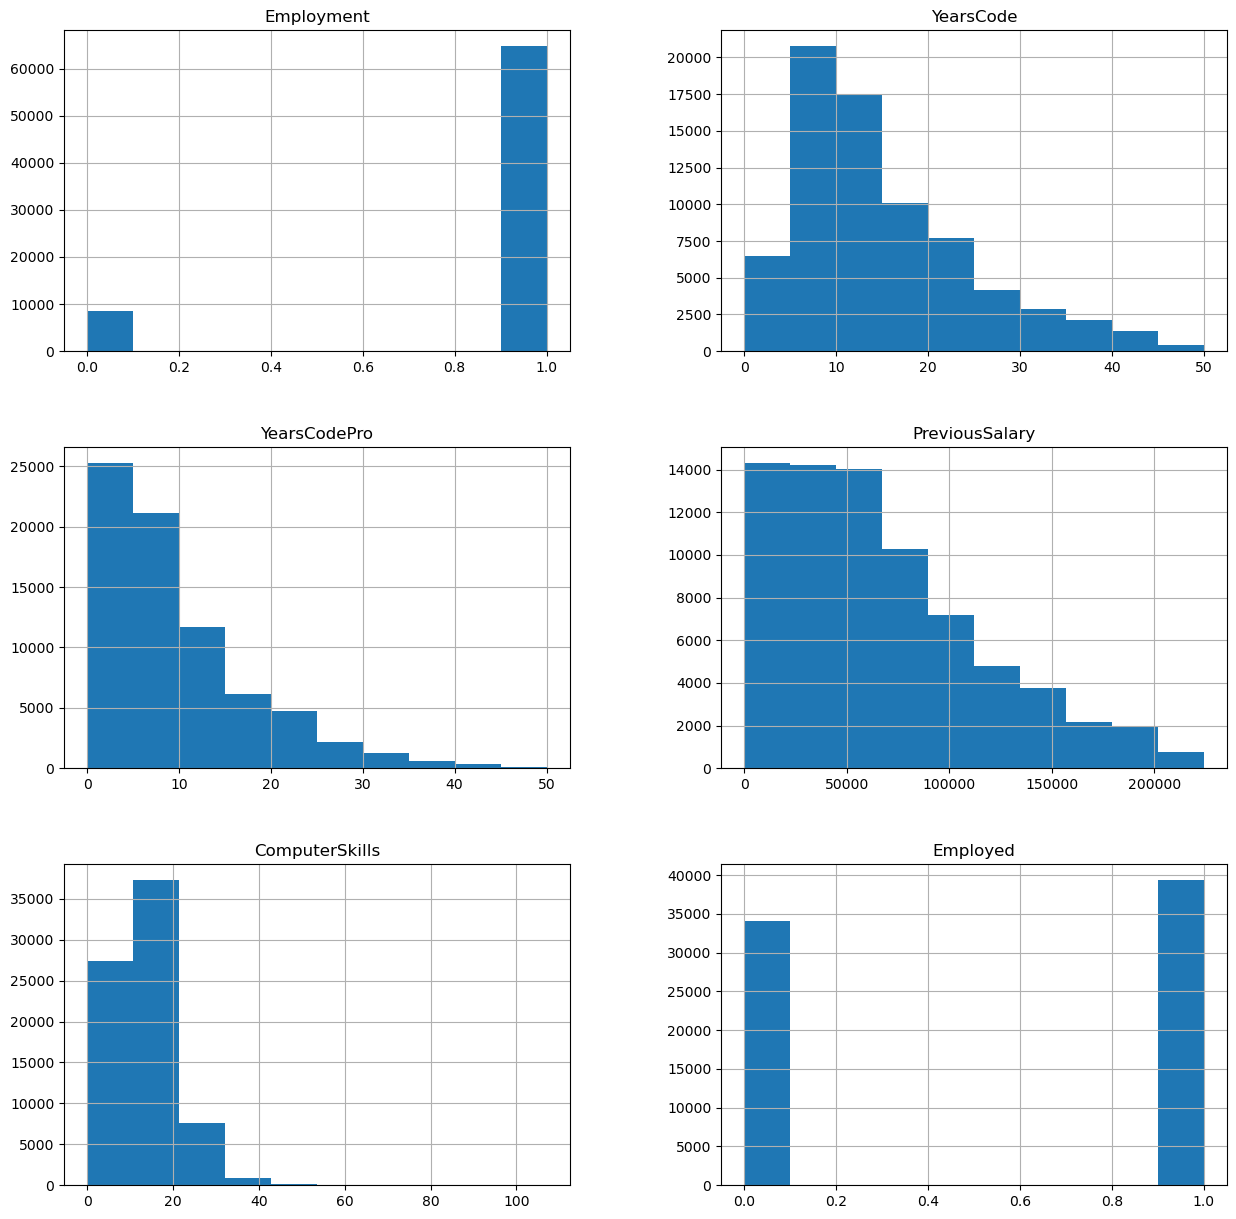

In [9]:
#To visualize the data distribution - Univariate Analysis
std.hist(figsize = (15,15))
plt.show()

In [10]:
#To view the statistical details of categorical values
std.describe(include = 'object')

,Age,Accessibility,EdLevel,Gender,MentalHealth,MainBranch,Country,HaveWorkedWith
count,73462,73462,73462,73462,73462,73462,73462,73399
unique,2,2,5,3,2,2,172,69980
top,<35,No,Undergraduate,Man,No,Dev,United States of America,Python
freq,47819,71355,37402,68573,56944,67396,14696,71


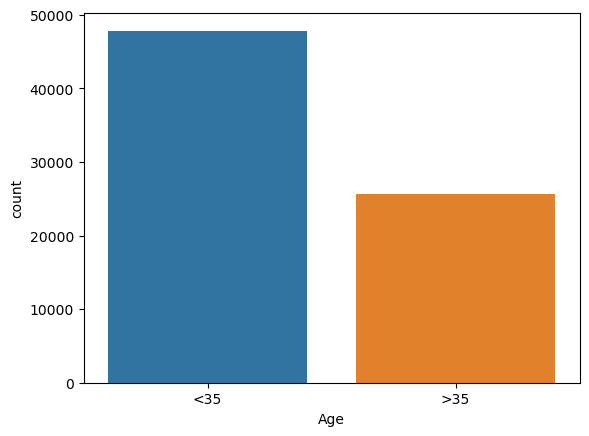

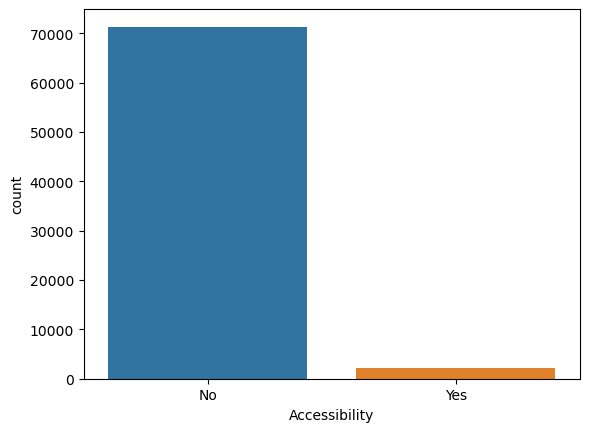

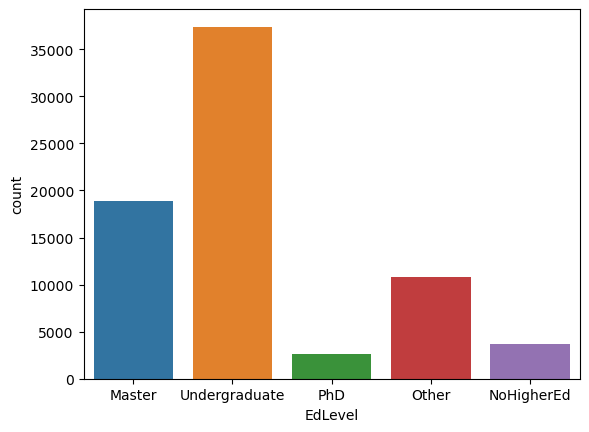

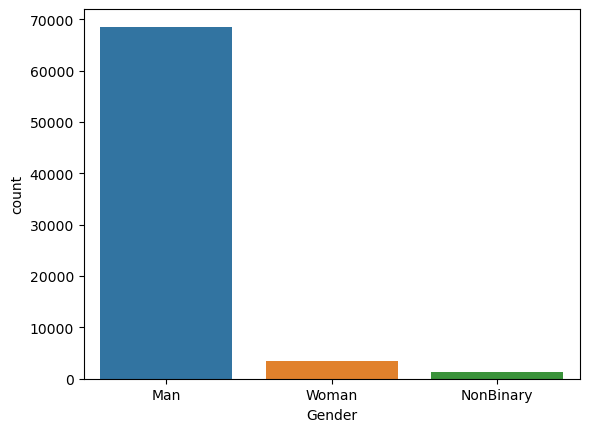

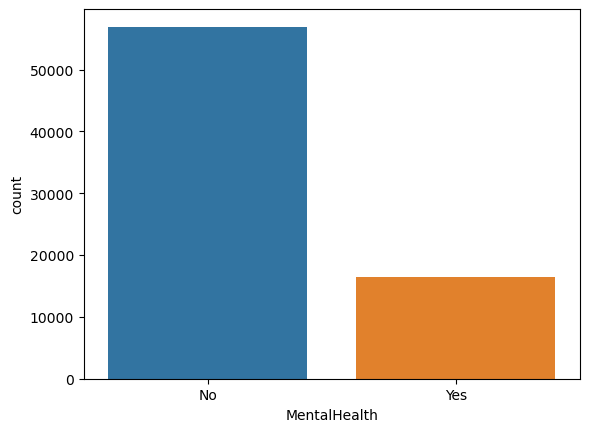

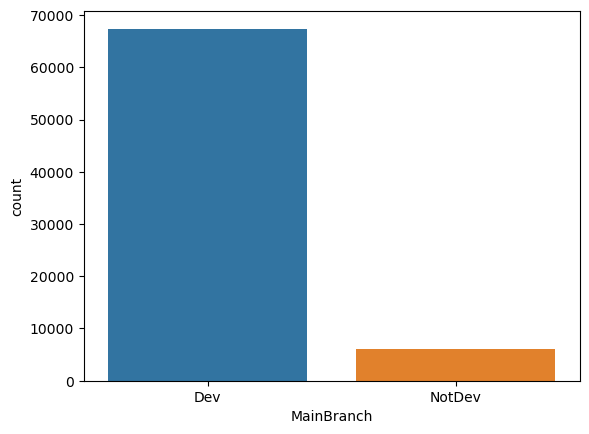

In [11]:
#To visualize the distribution of categorical variables:
for columns in std.select_dtypes(include = 'object'):
    if std[columns].nunique() < 10 :
        sns.countplot(x=columns, data = std)
        plt.show()
        

In [12]:
##Check bivariate analysis for other variables - which plot to use where

<Axes: xlabel='Age', ylabel='Employed'>

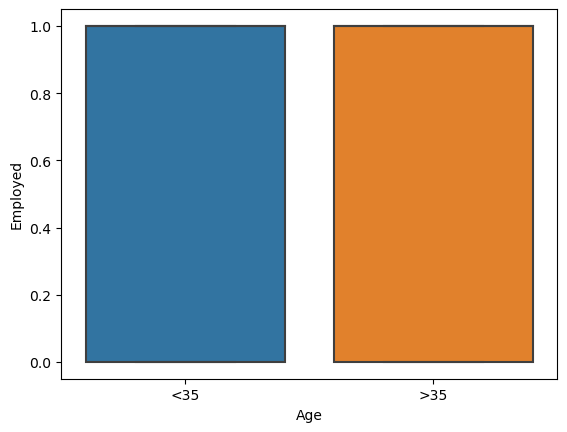

In [13]:
#Bi-Variate Analysis
sns.boxplot(x='Age', y = 'Employed', data = std)


<Axes: xlabel='PreviousSalary'>

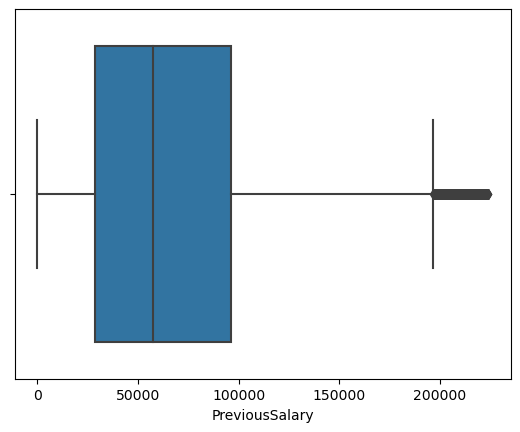

In [14]:
##Checking for outliers
sns.boxplot(x = std['PreviousSalary'])

<Axes: xlabel='YearsCode'>

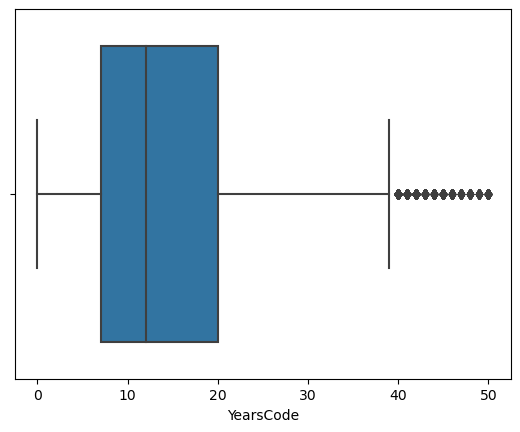

In [15]:
sns.boxplot(x = std['YearsCode'])

In [16]:
##Generating Insights:
std.groupby('Country')['PreviousSalary'].agg(lambda x: round(np.mean(x))).sort_values(ascending = False).head(30)

Country
United States of America                                123776
Israel                                                  114151
Switzerland                                             105380
Andorra                                                  90379
Denmark                                                  90197
Iceland                                                  89739
Australia                                                89011
Isle of Man                                              86608
Canada                                                   86353
Ireland                                                  84811
Nomadic                                                  83040
Norway                                                   81978
United Kingdom of Great Britain and Northern Ireland     81117
Lao People's Democratic Republic                         79739
New Zealand                                              77013
Luxembourg                                     

#From the above, we understand that US, Israel and Switzerland are in top three salary package deliveries.

<Axes: xlabel='PreviousSalary', ylabel='Count'>

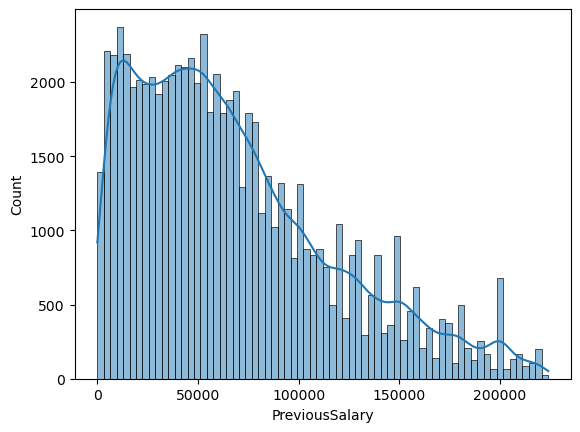

In [17]:
#To identify variables have normal distribution or not
sns.histplot(std.PreviousSalary, kde = True)

In [18]:
#Data transformation for skewed distribution
df = std

In [19]:
import scipy.stats as stat

<Axes: xlabel='PreviousSalary', ylabel='Count'>

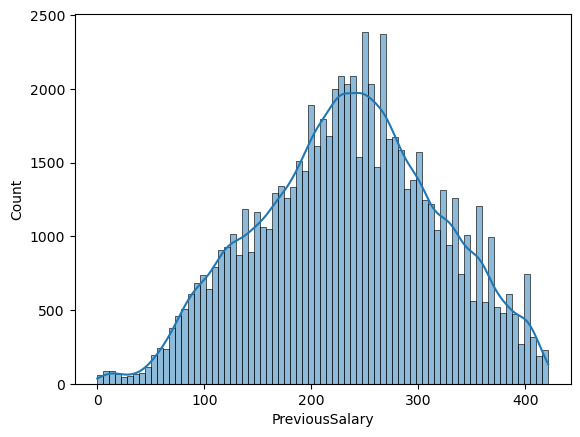

In [20]:
df['PreviousSalary'], parameters = stat.boxcox(std['PreviousSalary'])
sns.histplot(df.PreviousSalary, kde = True)

In [21]:
std.columns

Index(['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender',
       'MentalHealth', 'MainBranch', 'YearsCode', 'YearsCodePro', 'Country',
       'PreviousSalary', 'HaveWorkedWith', 'ComputerSkills', 'Employed'],
      dtype='object')

In [22]:
std.groupby(by = 'Employed').agg('median')[['PreviousSalary','ComputerSkills','YearsCode']]

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7304\1568972668.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std.groupby(by = 'Employed').agg('median')[['PreviousSalary','ComputerSkills','YearsCode']]


,PreviousSalary,ComputerSkills,YearsCode
Employed,,,
0,236.841874,9.0,12.0
1,236.841874,16.0,12.0


<Axes: xlabel='Age', ylabel='count'>

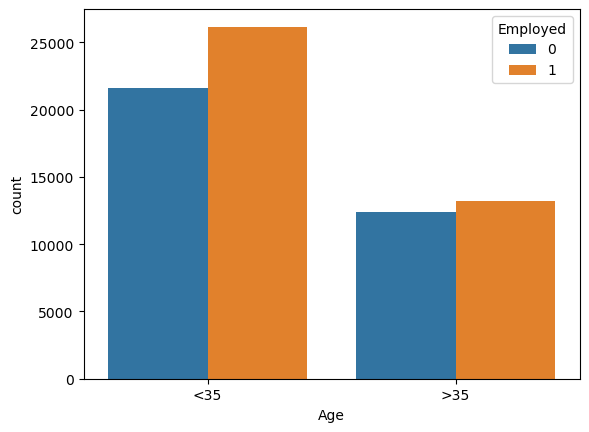

In [23]:
sns.countplot(x = 'Age', data = std, hue = 'Employed')

<Axes: xlabel='Gender', ylabel='count'>

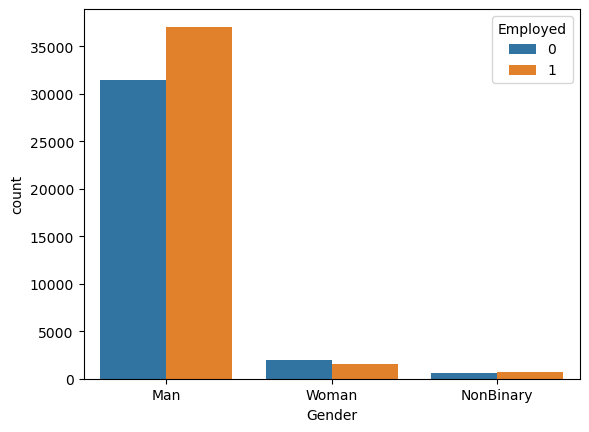

In [24]:
sns.countplot(x = 'Gender', data = std, hue = 'Employed')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7304\2727801105.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(std.corr(), cmap = 'YlGnBu', annot = True)


<Axes: >

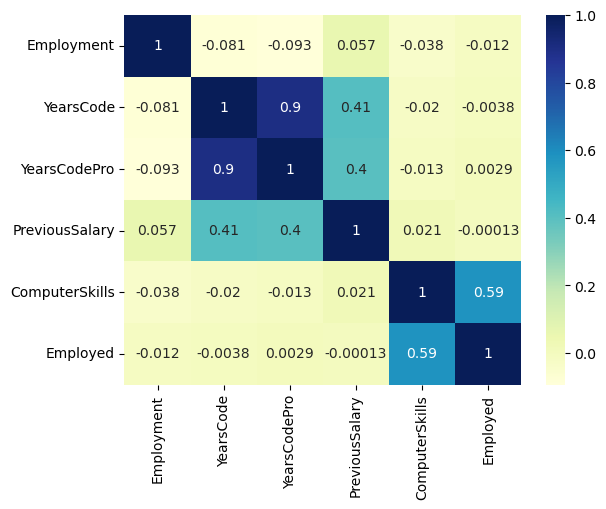

In [25]:
sns.heatmap(std.corr(), cmap = 'YlGnBu', annot = True)

#ComputerSkills and Employed, PreviousSalary and YearsCode are correlated to each other

In [26]:
#Converting Categorical variables to continous variable
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

cat = std.select_dtypes(include = 'object').keys()
cat

Index(['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth',
       'MainBranch', 'Country', 'HaveWorkedWith'],
      dtype='object')

In [27]:
for x in cat:
    print(x,':', len(std[x].unique()) )

Age : 2
Accessibility : 2
EdLevel : 5
Gender : 3
MentalHealth : 2
MainBranch : 2
Country : 172
HaveWorkedWith : 69981


In [28]:
top_10 = [x for x in std.Country.value_counts().sort_values(ascending = False).head(30).index]
top_10

['United States of America',
 'Germany',
 'India',
 'United Kingdom of Great Britain and Northern Ireland',
 'Canada',
 'France',
 'Brazil',
 'Poland',
 'Netherlands',
 'Spain',
 'Australia',
 'Italy',
 'Sweden',
 'Russian Federation',
 'Switzerland',
 'Turkey',
 'Austria',
 'Israel',
 'Czech Republic',
 'Mexico',
 'Belgium',
 'Denmark',
 'Ukraine',
 'Argentina',
 'Norway',
 'Iran, Islamic Republic of...',
 'Finland',
 'South Africa',
 'Pakistan',
 'Portugal']

In [29]:
def top_x(df2, variable, top_x_labels):
    for label in top_x_labels:
        df2[variable + '_' + label] = np.where(std[variable] == label,1,0)
        
top_x(std, 'Country', top_10)
std.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,...,Country_Belgium,Country_Denmark,Country_Ukraine,Country_Argentina,Country_Norway,"Country_Iran, Islamic Republic of...",Country_Finland,Country_South Africa,Country_Pakistan,Country_Portugal
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,...,0,0,0,0,0,0,0,0,0,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,...,0,0,0,0,0,0,0,0,0,0
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,...,0,0,0,0,0,0,0,0,0,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,...,0,0,0,0,0,0,0,0,0,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,...,0,0,0,0,0,0,0,0,0,0
5,<35,No,Master,1,Man,No,Dev,9,2,France,...,0,0,0,0,0,0,0,0,0,0
6,>35,No,Master,1,Man,No,Dev,26,18,Germany,...,0,0,0,0,0,0,0,0,0,0
7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,...,0,0,0,0,0,0,0,0,0,0
8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,...,0,0,0,0,0,0,0,0,0,0
9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#repeating one-hot encoding for other categorical variables
top_10 = [x for x in std.Age.value_counts().sort_values(ascending = False).head(30).index]
top_10
def top_x(df2, variable, top_x_labels):
    for label in top_x_labels:
        df2[variable + '_' + label] = np.where(std[variable] == label,1,0)
        
top_x(std, 'Age', top_10)
std.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,...,Country_Ukraine,Country_Argentina,Country_Norway,"Country_Iran, Islamic Republic of...",Country_Finland,Country_South Africa,Country_Pakistan,Country_Portugal,Age_<35,Age_>35
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,...,0,0,0,0,0,0,0,0,1,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,...,0,0,0,0,0,0,0,0,1,0
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,...,0,0,0,0,0,0,0,0,1,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,...,0,0,0,0,0,0,0,0,1,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,...,0,0,0,0,0,0,0,0,0,1
5,<35,No,Master,1,Man,No,Dev,9,2,France,...,0,0,0,0,0,0,0,0,1,0
6,>35,No,Master,1,Man,No,Dev,26,18,Germany,...,0,0,0,0,0,0,0,0,0,1
7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,...,0,0,0,0,0,0,0,0,1,0
8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,...,0,0,0,0,0,0,0,0,0,1
9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,...,0,0,0,0,0,0,0,0,0,1


In [31]:
##Try to do the above process in a recursive loop for every column in cat;
#have a dataset that have only the encoded variables and then build the model;

In [32]:
top_10 = [x for x in std.Accessibility.value_counts().sort_values(ascending = False).head(30).index]
top_10
def top_x(df2, variable, top_x_labels):
    for label in top_x_labels:
        df2[variable + '_' + label] = np.where(std[variable] == label,1,0)
        
top_x(std, 'Accessibility', top_10)
std.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,...,Country_Norway,"Country_Iran, Islamic Republic of...",Country_Finland,Country_South Africa,Country_Pakistan,Country_Portugal,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,...,0,0,0,0,0,0,1,0,1,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,...,0,0,0,0,0,0,1,0,1,0
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,...,0,0,0,0,0,0,1,0,1,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,...,0,0,0,0,0,0,1,0,1,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,...,0,0,0,0,0,0,0,1,1,0
5,<35,No,Master,1,Man,No,Dev,9,2,France,...,0,0,0,0,0,0,1,0,1,0
6,>35,No,Master,1,Man,No,Dev,26,18,Germany,...,0,0,0,0,0,0,0,1,1,0
7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,...,0,0,0,0,0,0,1,0,1,0
8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,...,0,0,0,0,0,0,0,1,1,0
9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,...,0,0,0,0,0,0,0,1,1,0


In [33]:
top_10 = [x for x in std.EdLevel.value_counts().sort_values(ascending = False).head(30).index]
top_10
def top_x(df2, variable, top_x_labels):
    for label in top_x_labels:
        df2[variable + '_' + label] = np.where(std[variable] == label,1,0)
        
top_x(std, 'EdLevel', top_10)
std.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,...,Country_Portugal,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Undergraduate,EdLevel_Master,EdLevel_Other,EdLevel_NoHigherEd,EdLevel_PhD
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,...,0,1,0,1,0,0,1,0,0,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,...,0,1,0,1,0,1,0,0,0,0
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,...,0,1,0,1,0,0,1,0,0,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,...,0,1,0,1,0,1,0,0,0,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,...,0,0,1,1,0,0,0,0,0,1
5,<35,No,Master,1,Man,No,Dev,9,2,France,...,0,1,0,1,0,0,1,0,0,0
6,>35,No,Master,1,Man,No,Dev,26,18,Germany,...,0,0,1,1,0,0,1,0,0,0
7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,...,0,1,0,1,0,0,1,0,0,0
8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,...,0,0,1,1,0,1,0,0,0,0
9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,...,0,0,1,1,0,0,1,0,0,0


In [34]:
top_10 = [x for x in std.Gender.value_counts().sort_values(ascending = False).head(30).index]
top_10
def top_x(df2, variable, top_x_labels):
    for label in top_x_labels:
        df2[variable + '_' + label] = np.where(std[variable] == label,1,0)
        
top_x(std, 'Gender', top_10)
std.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,...,Accessibility_No,Accessibility_Yes,EdLevel_Undergraduate,EdLevel_Master,EdLevel_Other,EdLevel_NoHigherEd,EdLevel_PhD,Gender_Man,Gender_Woman,Gender_NonBinary
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,...,1,0,0,1,0,0,0,1,0,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,...,1,0,1,0,0,0,0,1,0,0
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,...,1,0,0,1,0,0,0,1,0,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,...,1,0,1,0,0,0,0,1,0,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,...,1,0,0,0,0,0,1,1,0,0
5,<35,No,Master,1,Man,No,Dev,9,2,France,...,1,0,0,1,0,0,0,1,0,0
6,>35,No,Master,1,Man,No,Dev,26,18,Germany,...,1,0,0,1,0,0,0,1,0,0
7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,...,1,0,0,1,0,0,0,1,0,0
8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,...,1,0,1,0,0,0,0,1,0,0
9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,...,1,0,0,1,0,0,0,1,0,0


In [35]:
top_10 = [x for x in std.MentalHealth.value_counts().sort_values(ascending = False).head(30).index]
top_10
def top_x(df2, variable, top_x_labels):
    for label in top_x_labels:
        df2[variable + '_' + label] = np.where(std[variable] == label,1,0)
        
top_x(std, 'MentalHealth', top_10)
std.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,...,EdLevel_Undergraduate,EdLevel_Master,EdLevel_Other,EdLevel_NoHigherEd,EdLevel_PhD,Gender_Man,Gender_Woman,Gender_NonBinary,MentalHealth_No,MentalHealth_Yes
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,...,0,1,0,0,0,1,0,0,1,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,...,1,0,0,0,0,1,0,0,1,0
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,...,0,1,0,0,0,1,0,0,1,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,...,1,0,0,0,0,1,0,0,1,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,...,0,0,0,0,1,1,0,0,1,0
5,<35,No,Master,1,Man,No,Dev,9,2,France,...,0,1,0,0,0,1,0,0,1,0
6,>35,No,Master,1,Man,No,Dev,26,18,Germany,...,0,1,0,0,0,1,0,0,1,0
7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,...,0,1,0,0,0,1,0,0,1,0
8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,...,1,0,0,0,0,1,0,0,1,0
9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,...,0,1,0,0,0,1,0,0,1,0


In [36]:
top_10 = [x for x in std.MainBranch.value_counts().sort_values(ascending = False).head(30).index]
top_10
def top_x(df2, variable, top_x_labels):
    for label in top_x_labels:
        df2[variable + '_' + label] = np.where(std[variable] == label,1,0)
        
top_x(std, 'MainBranch', top_10)
std.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,...,EdLevel_Other,EdLevel_NoHigherEd,EdLevel_PhD,Gender_Man,Gender_Woman,Gender_NonBinary,MentalHealth_No,MentalHealth_Yes,MainBranch_Dev,MainBranch_NotDev
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,...,0,0,0,1,0,0,1,0,1,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,...,0,0,0,1,0,0,1,0,1,0
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,...,0,0,0,1,0,0,1,0,1,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,...,0,0,0,1,0,0,1,0,1,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,...,0,0,1,1,0,0,1,0,0,1
5,<35,No,Master,1,Man,No,Dev,9,2,France,...,0,0,0,1,0,0,1,0,1,0
6,>35,No,Master,1,Man,No,Dev,26,18,Germany,...,0,0,0,1,0,0,1,0,1,0
7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,...,0,0,0,1,0,0,1,0,0,1
8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,...,0,0,0,1,0,0,1,0,1,0
9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,...,0,0,0,1,0,0,1,0,1,0


In [37]:
top_10 = [x for x in std.HaveWorkedWith.value_counts().sort_values(ascending = False).head(30).index]
top_10
def top_x(df2, variable, top_x_labels):
    for label in top_x_labels:
        df2[variable + '_' + label] = np.where(std[variable] == label,1,0)
        
top_x(std, 'HaveWorkedWith', top_10)
std.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,...,HaveWorkedWith_C;C++;Git,HaveWorkedWith_Swift,HaveWorkedWith_C#;Unity 3D,HaveWorkedWith_HTML/CSS;JavaScript;PHP;SQL;jQuery;MySQL,HaveWorkedWith_C#;HTML/CSS;JavaScript;SQL;ASP.NET;jQuery;Microsoft SQL Server,HaveWorkedWith_Delphi;Microsoft SQL Server,HaveWorkedWith_Bash/Shell;C;C++;Python,HaveWorkedWith_Java;Kotlin;SQLite,HaveWorkedWith_C#;HTML/CSS;JavaScript;SQL;ASP.NET;ASP.NET Core ;jQuery;Microsoft SQL Server,HaveWorkedWith_C#;Microsoft SQL Server
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,...,0,0,0,0,0,0,0,0,0,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,...,0,0,0,0,0,0,0,0,0,0
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,...,0,0,0,0,0,0,0,0,0,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,...,0,0,0,0,0,0,0,0,0,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,...,0,0,0,0,0,0,0,0,0,0
5,<35,No,Master,1,Man,No,Dev,9,2,France,...,0,0,0,0,0,0,0,0,0,0
6,>35,No,Master,1,Man,No,Dev,26,18,Germany,...,0,0,0,0,0,0,0,0,0,0
7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,...,0,0,0,0,0,0,0,0,0,0
8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,...,0,0,0,0,0,0,0,0,0,0
9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,...,0,0,0,0,0,0,0,0,0,0


In [38]:
std.columns

Index(['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender',
       'MentalHealth', 'MainBranch', 'YearsCode', 'YearsCodePro', 'Country',
       'PreviousSalary', 'HaveWorkedWith', 'ComputerSkills', 'Employed',
       'Country_United States of America', 'Country_Germany', 'Country_India',
       'Country_United Kingdom of Great Britain and Northern Ireland',
       'Country_Canada', 'Country_France', 'Country_Brazil', 'Country_Poland',
       'Country_Netherlands', 'Country_Spain', 'Country_Australia',
       'Country_Italy', 'Country_Sweden', 'Country_Russian Federation',
       'Country_Switzerland', 'Country_Turkey', 'Country_Austria',
       'Country_Israel', 'Country_Czech Republic', 'Country_Mexico',
       'Country_Belgium', 'Country_Denmark', 'Country_Ukraine',
       'Country_Argentina', 'Country_Norway',
       'Country_Iran, Islamic Republic of...', 'Country_Finland',
       'Country_South Africa', 'Country_Pakistan', 'Country_Portugal',
       'Age_<35', 'Age_>35', 'Ac

In [39]:
std = std[['YearsCode', 'YearsCodePro', 'PreviousSalary','ComputerSkills', 'Employed','Country_United States of America', 'Country_Germany', 'Country_India','Country_United Kingdom of Great Britain and Northern Ireland','Country_Canada', 'Country_France', 'Country_Brazil', 'Country_Poland','Country_Netherlands', 'Country_Spain', 'Country_Australia','Country_Italy', 'Country_Sweden', 'Country_Russian Federation','Country_Switzerland','Age_<35', 'Age_>35', 'Accessibility_No', 'Accessibility_Yes',
       'EdLevel_Undergraduate', 'EdLevel_Master', 'EdLevel_Other',
       'EdLevel_NoHigherEd', 'EdLevel_PhD', 'Gender_Man', 'Gender_Woman',
       'Gender_NonBinary', 'MentalHealth_No', 'MentalHealth_Yes',
       'MainBranch_Dev', 'MainBranch_NotDev','HaveWorkedWith_Python',
       'HaveWorkedWith_Python;Git', 'HaveWorkedWith_C++;Python',
       'HaveWorkedWith_C++', 'HaveWorkedWith_C++;Python;Git',
       'HaveWorkedWith_Swift;Git', 'HaveWorkedWith_C++;Git',
       'HaveWorkedWith_Delphi', 'HaveWorkedWith_R',
       'HaveWorkedWith_C;C++;Python']]
std.head(15)

,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,Country_United States of America,Country_Germany,Country_India,Country_United Kingdom of Great Britain and Northern Ireland,Country_Canada,...,HaveWorkedWith_Python,HaveWorkedWith_Python;Git,HaveWorkedWith_C++;Python,HaveWorkedWith_C++,HaveWorkedWith_C++;Python;Git,HaveWorkedWith_Swift;Git,HaveWorkedWith_C++;Git,HaveWorkedWith_Delphi,HaveWorkedWith_R,HaveWorkedWith_C;C++;Python
0,7,4,225.953662,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,5,216.221974,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,6,268.368037,7,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,6,215.533903,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,40,30,366.235133,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,9,2,200.476112,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,26,18,269.163747,17,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,14,5,274.218671,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,39,21,254.970163,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,20,16,197.903075,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
##Model building - Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

In [41]:
#Initialize the data

#Dropping Previous salary from the dataframe as it is intended for the predicting the target variable
y = std['PreviousSalary'].values.reshape(-1,)
X = std.drop(['PreviousSalary'], axis = 1)

#Spliting into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 45)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(58769, 45) (14693, 45) (58769,) (14693,)


In [42]:
X.shape

(73462, 45)

In [43]:
y.shape

(73462,)

In [45]:
regressor = LinearRegression()

#Fitting the model

regressor.fit(X_train,y_train)

#Predicting the model

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

#Calculating error
rmse_train = mean_squared_error(y_train,y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test,y_test_pred, squared=False)   

print(f"RMSE for Training dataset {round(rmse_train)} and RMSE for Testing dataset {round(rmse_test)}")

#Testing accuracy- Variance score
print("Training accuracy : ", format(regressor.score(X_train,y_train)))
print("Testing accuracy : ", format(regressor.score(X_test,y_test)))

RMSE for Training dataset 58 and RMSE for Testing dataset 57
Training accuracy :  0.5252479093795162
Testing accuracy :  0.5343013384785555


In [47]:
print('Model Coefficients: \n')

for i in range(X.shape[1]):
    print(X.columns[i],':', regressor.coef_[i].round())

Model Coefficients: 

YearsCode : 1.0
YearsCodePro : 2.0
ComputerSkills : 1.0
Employed : -6.0
Country_United States of America : 116.0
Country_Germany : 48.0
Country_India : -42.0
Country_United Kingdom of Great Britain and Northern Ireland : 60.0
Country_Canada : 72.0
Country_France : 19.0
Country_Brazil : -23.0
Country_Poland : 15.0
Country_Netherlands : 45.0
Country_Spain : 9.0
Country_Australia : 69.0
Country_Italy : -3.0
Country_Sweden : 37.0
Country_Russian Federation : -6.0
Country_Switzerland : 96.0
Age_<35 : -3.0
Age_>35 : 3.0
Accessibility_No : 7.0
Accessibility_Yes : -7.0
EdLevel_Undergraduate : -2.0
EdLevel_Master : 12.0
EdLevel_Other : -10.0
EdLevel_NoHigherEd : -11.0
EdLevel_PhD : 12.0
Gender_Man : 3.0
Gender_Woman : -5.0
Gender_NonBinary : 1.0
MentalHealth_No : 1.0
MentalHealth_Yes : -1.0
MainBranch_Dev : 5.0
MainBranch_NotDev : -5.0
HaveWorkedWith_Python : -9.0
HaveWorkedWith_Python;Git : -7.0
HaveWorkedWith_C++;Python : -1.0
HaveWorkedWith_C++ : -16.0
HaveWorkedWith_C+

In [48]:
##Obtaining the predicted values
total_pred = regressor.predict(X)

In [49]:
std['TargetSalaryPrediction'] = total_pred

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7304\2843100399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std['TargetSalaryPrediction'] = total_pred


In [50]:
std.head(5)

,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,Country_United States of America,Country_Germany,Country_India,Country_United Kingdom of Great Britain and Northern Ireland,Country_Canada,...,HaveWorkedWith_Python;Git,HaveWorkedWith_C++;Python,HaveWorkedWith_C++,HaveWorkedWith_C++;Python;Git,HaveWorkedWith_Swift;Git,HaveWorkedWith_C++;Git,HaveWorkedWith_Delphi,HaveWorkedWith_R,HaveWorkedWith_C;C++;Python,TargetSalaryPrediction
0,7,4,225.953662,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,229.097986
1,12,5,216.221974,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,192.996617
2,15,6,268.368037,7,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,252.385417
3,9,6,215.533903,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,262.953957
4,40,30,366.235133,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,259.866381


In [53]:
std.columns

Index(['YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills',
       'Employed', 'Country_United States of America', 'Country_Germany',
       'Country_India',
       'Country_United Kingdom of Great Britain and Northern Ireland',
       'Country_Canada', 'Country_France', 'Country_Brazil', 'Country_Poland',
       'Country_Netherlands', 'Country_Spain', 'Country_Australia',
       'Country_Italy', 'Country_Sweden', 'Country_Russian Federation',
       'Country_Switzerland', 'Age_<35', 'Age_>35', 'Accessibility_No',
       'Accessibility_Yes', 'EdLevel_Undergraduate', 'EdLevel_Master',
       'EdLevel_Other', 'EdLevel_NoHigherEd', 'EdLevel_PhD', 'Gender_Man',
       'Gender_Woman', 'Gender_NonBinary', 'MentalHealth_No',
       'MentalHealth_Yes', 'MainBranch_Dev', 'MainBranch_NotDev',
       'HaveWorkedWith_Python', 'HaveWorkedWith_Python;Git',
       'HaveWorkedWith_C++;Python', 'HaveWorkedWith_C++',
       'HaveWorkedWith_C++;Python;Git', 'HaveWorkedWith_Swift;Git',
       

In [55]:
std.to_csv("Predicted_Salary1.csv")